In [1]:
using Makie
using Random

In [2]:
function force1Body2D(x,y, dl,k ; m=1., g=9.8)
    θ = atan(y,x)
    l = sqrt(x^2 + y^2)
    
    ax = -k * (l-dl) * cos(θ) + g
    ay = -k * (l-dl) * sin(θ) 
    
    return ax, ay
end



force1Body2D (generic function with 1 method)

# オイラー1体2D

In [3]:
function オイラー(θ,ω;T=20., dt=1e-3,k=1e3)
    dl = 1.0
    m = 1.
    g = 9.8
    
    numStep = length(0:dt:T)
    
    x = dl * cos(θ)
    y = dl * sin(θ)
    u =  -dl * ω * sin(θ)
    v =  dl * ω * cos(θ)
    
    xlist = Vector{Float64}(undef,numStep)
    ylist = Vector{Float64}(undef,numStep)
    ulist = Vector{Float64}(undef,numStep)
    vlist = Vector{Float64}(undef,numStep)
    
    for (i,t) in enumerate(0:dt:T)
        # リストに書き込む
        xlist[i] = x
        ylist[i] = y
        ulist[i] = u
        vlist[i] = v
        
        dx, dy = dt * u , dt * v
        du, dv = dt .* force1Body2D(x,y,dl,k)
        
        x += dx
        y += dy
        u += du
        v += dv
        
    end
    return 0:dt:T, xlist, ylist, ulist, vlist
end

オイラー (generic function with 1 method)

# ホイン法 1体 2D

In [4]:
function ホイン(θ, ω; T=20., dt=1e-3,k=1e3)
    dl = 1.
    m = 1.
    g = 9.8
    
    numStep = length(0:dt:T)
    
    x, y = dl * [cos(θ) sin(θ)]
    u, v =  dl * ω * [-sin(θ) cos(θ)]
    
    xlist = Vector{Float64}(undef,numStep)
    ylist = Vector{Float64}(undef,numStep)
    ulist = Vector{Float64}(undef,numStep)
    vlist = Vector{Float64}(undef,numStep)
    
    for (i,t) in enumerate(0:dt:T)
        # リストに書き込む
        xlist[i] = x
        ylist[i] = y
        ulist[i] = u
        vlist[i] = v
        
        # 微小変化の計算
        dx1 = u
        dy1 = v
        du1, dv1 = force1Body2D(x,y,dl,k)
        
        x1 = x + dt*dx1 
        y1 = y + dt*dy1
        u1 = u + dt*du1
        v1 = v + dt*dv1
        
        dx2 = u1
        dy2 = v1
        du2, dv2 = force1Body2D(x1,y1,dl,k)
        x += .5dt*(dx1 + dx2) 
        y += .5dt*(dy1 + dy2)
        u += .5dt*(du1 + du2)
        v += .5dt*(dv1 + dv2)
        
    end
    return 0:dt:T, xlist, ylist, ulist, vlist
end




ホイン (generic function with 1 method)

# ルンゲクッタ 1体 2D

In [5]:
function ルンゲクッタ(θ, ω; T=20., dt=1e-3,k=1e3)
    dl = 1.
    m = 1.
    g = 9.8
    
    numStep = length(0:dt:T)
    
    x, y = dl * [cos(θ) sin(θ)]
    u, v =  dl * ω * [-sin(θ) cos(θ)]
    
    xlist = Vector{Float64}(undef,numStep)
    ylist = Vector{Float64}(undef,numStep)
    ulist = Vector{Float64}(undef,numStep)
    vlist = Vector{Float64}(undef,numStep)
    
    for (i,t) in enumerate(0:dt:T)
        # リストに書き込む
        xlist[i] = x
        ylist[i] = y
        ulist[i] = u
        vlist[i] = v
        
        # 微小変化の計算
        # k1
        dx1 = u
        dy1 = v
        du1, dv1 = force1Body2D(x,y,dl,k)
        
        # k2
        x1 = x + .5dt*dx1 
        y1 = y + .5dt*dy1
        u1 = u + .5dt*du1
        v1 = v + .5dt*dv1
        
        dx2 = u1
        dy2 = v1
        du2, dv2 = force1Body2D(x1,y1,dl,k)
        
        # k3
        x2 = x + .5dt*dx2 
        y2 = y + .5dt*dy2
        u2 = u + .5dt*du2
        v2 = v + .5dt*dv2
        
        dx3 = u2
        dy3 = v2
        du3, dv3 = force1Body2D(x2,y2,dl,k)
        
        # k4
        x3 = x + dt*dx3 
        y3 = y + dt*dy3
        u3 = u + dt*du3
        v3 = v + dt*dv3
        
        dx4 = u3
        dy4 = v3
        du4, dv4 = force1Body2D(x3,y3,dl,k)
        
        # がっちゃんこ
        x += dt*(dx1 + 2dx2 + 2dx3 + dx4)/6. 
        y += dt*(dy1 + 2dy2 + 2dy3 + dy4)/6.
        u += dt*(du1 + 2du2 + 2du3 + du4)/6.
        v += dt*(dv1 + 2dv2 + 2dv3 + dv4)/6.
        
    end
    return 0:dt:T, xlist, ylist, ulist, vlist
end




ルンゲクッタ (generic function with 1 method)

In [8]:
function movie(t,x,y)
    dl= 1.
    
    scene = Scene(resolution = (800,800))
    mystep = Node(1)

    scene = scatter!(
        scene, lift(i -> [x[i] y[i]], mystep),
        markersize = dl,
        color = :blue,
        #color = to_colormap(:viridis,1),
        #
        limits =FRect(-5., -5., 10., 10.)
    )
        


    record(scene, "yossha3.mp4",range(1,length(t))) do i
        #println(i)
        mystep[]=i
        end;
    
end

movie (generic function with 1 method)

In [9]:
function movie(t,x,y,x2,y2)
    dl= 1.
    
    scene = Scene(resolution = (800,800))
    mystep = Node(1)

    scene = scatter!(
        scene, lift(i -> [x[i] y[i]], mystep),
        markersize = dl,
        color = :blue,
        #color = to_colormap(:viridis,1),
        #
        limits =FRect(-5., -5., 10., 10.)
    )
    scene = scatter!(
        scene, lift(i -> [x2[i] y2[i]], mystep),
        markersize = dl,
        color = :green,
        #color = to_colormap(:viridis,1),
        #
        limits =FRect(-5., -5., 10., 10.)
    )   


    record(scene, "yossha3.mp4",range(1,length(t))) do i
        #println(i)
        mystep[]=i
        end;
    
end

movie (generic function with 2 methods)

In [18]:
function movie(t,x,y,x2,y2,x3,y3;step = 1)
    dl= 1.
    
    scene = Scene(resolution = (800,800))
    mystep = Node(1)

    scene = scatter!(
        scene, lift(i -> [x[i] y[i]], mystep),
        markersize = dl,
        color = :red,
        #color = to_colormap(:viridis,1),
        #
        limits =FRect(-5., -5., 10., 10.)
    )
    scene = scatter!(
        scene, lift(i -> [x2[i] y2[i]], mystep),
        markersize = dl,
        color = :blue,
        #color = to_colormap(:viridis,1),
        #
        limits =FRect(-5., -5., 10., 10.)
    )   
    scene = scatter!(
        scene, lift(i -> [x3[i] y3[i]], mystep),
        markersize = dl,
        color = :green,
        #color = to_colormap(:viridis,1),
        #
        limits =FRect(-5., -5., 10., 10.)
    ) 

    record(scene, "yossha3.mp4",range(1,length(t),step=step);framerate=60) do i
        #println(i)
        mystep[]=i
        end;
    
end

movie (generic function with 3 methods)

In [258]:
@time movie(t2,y2,-x2)

┌ Warning: `range(start, stop)` (with neither `length` nor `step` given) is deprecated, use `range(start, stop=stop)` instead.
│   caller = movie(::StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}, ::Array{Float64,1}, ::Array{Float64,1}) at In[257]:16
└ @ Main .\In[257]:16


 96.148741 seconds (2.55 M allocations: 3.670 GiB, 0.71% gc time)


"yossha3.mp4"

In [32]:
θ = 2π * rand()
ϕ = 6π # * (rand() - .5)

@time t,x,y,u,v = オイラー(θ, ϕ;T=10, dt=1e-3, k=1e5);
@time t1,x1,y1,u1,v1 = ホイン(θ, ϕ;T=10, dt=1e-3, k=1e5);
@time t2,x2,y2,u2,v2 = ルンゲクッタ(θ, ϕ;T=10, dt=1e-3, k=1e5);

  0.000931 seconds (26 allocations: 313.891 KiB)
  0.001408 seconds (30 allocations: 314.266 KiB)
  0.002344 seconds (30 allocations: 314.266 KiB)


In [33]:
@time movie(t2,y,-x,y1,-x1,y2,-x2; step=5)

 41.361065 seconds (3.55 M allocations: 3.695 GiB, 1.28% gc time)


"yossha3.mp4"

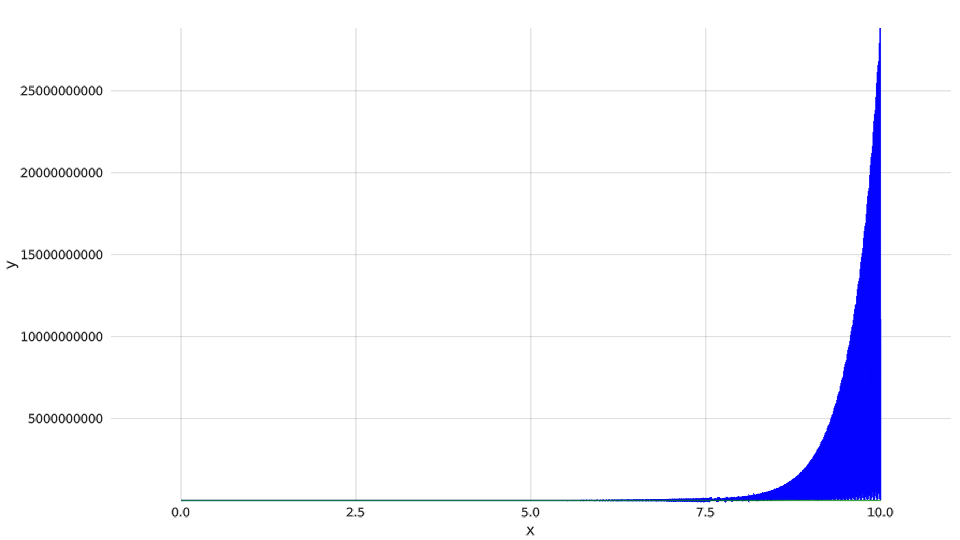

In [35]:
#lines(t,-x*9.8 + .5*u.^2 + .5*v.^2 , color = :red)
lines(t1,-x1*9.8 + .5*u1.^2 + .5*v1.^2, color = :blue)
lines!(t2,-x2*9.8 + .5*u2.^2 + .5*v2.^2, color = :green)